In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split


In [35]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, threshold=0.5, fnum = 2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = np.random.normal(loc=0.0, scale=1, size=1 + fnum)
        self.threshold = threshold

    def Z(self, X):
        return self.beta[0] + np.dot(X, self.beta[1:])

    def theta(self, Z):
        return 1./(1.+np.exp(-Z))

    def predict(self, X):
        theta = self.theta(self.Z(X))
        return np.where(theta >= self.threshold, 1, 0)

    def cost(self, y, theta):
        return np.sum(np.nan_to_num(-y * np.log(theta) - (1 - y) * np.log(1 - theta)))

    def gradient_decent(self, X, y):
        for i in range(self.epochs):
            theta = self.theta(self.Z(X))
            errors = y - theta
            self.beta[1:] += self.learning_rate * X.T.dot(errors) / len(y)
            self.beta[0] += self.learning_rate * errors.sum() / len(y)
            yield self.cost(y, theta)

    def fit(self, X, y):
        self.costs = []
        for cost in self.gradient_decent(X, y):
            self.costs.append(cost)

In [42]:
file_path = 'dataset/data1.txt'
data = pd.read_csv(file_path)

In [43]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [44]:
learning_rate = 0.1
epochs = 1000
threshold = 0.5
fnum = X.shape[1]

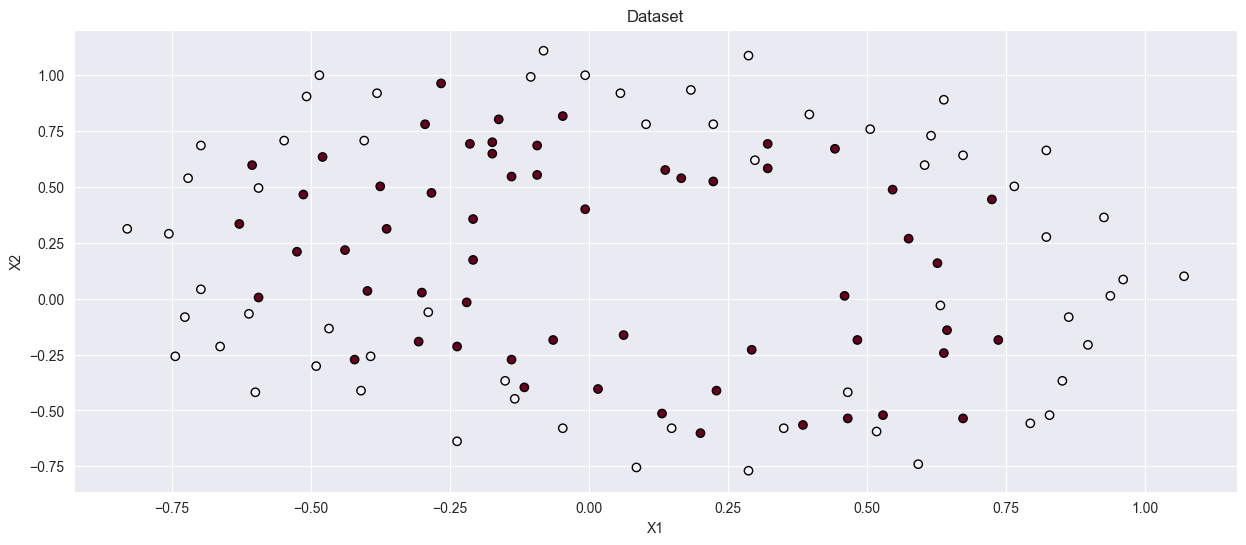

In [45]:
plt.figure(figsize=(15, 6))
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            cmap='PuRd',
            alpha=1,
            ec='black')

plt.xlabel("X1")
plt.ylabel("X2")

plt.axis('on')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
model = LogisticRegression(learning_rate, epochs, threshold, fnum)
model.fit(X_train, y_train)


In [48]:
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Точность модели: {accuracy:.3f}")

Точность модели: 0.417


In [49]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum( (x1 - x2)**2 ))

In [50]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)


    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_closest = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_closest]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [51]:
knn_model = KNN(k=7)
knn_model.fit(X_train, y_train)
outputs = knn_model.predict(X_test)

acc = np.sum(outputs == y_test) / len(y_test)
print(acc)

0.75
